In [2]:
import numpy as np
import sklearn
import pandas as pd
import time
import sys
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import Isomap
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import mean_squared_error

# Exploratory data analysis (EDA)

## Country Data

In [3]:
# read data from "data" folder
data_df = pd.read_csv("data/Country-data.csv")
data_des = pd.read_csv("data/data-dictionary.csv")

In [4]:
data_des

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


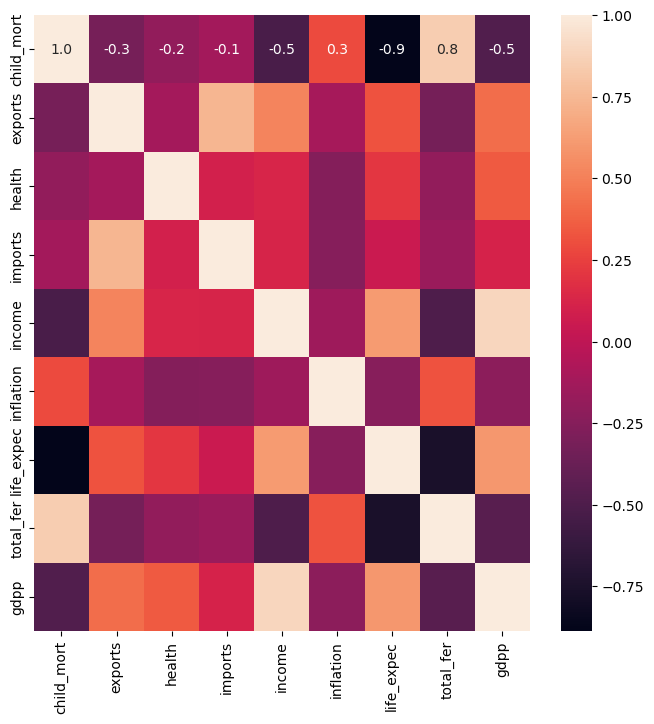

In [7]:
data_wo_country = data_df.drop(columns=["country"])
plt.figure(figsize=(8, 8))
sns.heatmap(data_wo_country.corr(), annot=True, fmt=".1f")
plt.show()

In [8]:
# Scaling the data and storing it in a new dataframe
scaler = StandardScaler()
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
data_scaled = pd.DataFrame(scaler.fit_transform(data_wo_country), columns=data_wo_country.columns)
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# K Mean

In [9]:
# SSE (sum of Squares errors), ss (Silhoutte score), chs (Calinski harabasz score)
clusters = list(range(2,20))
sse_km = {}
ss_km = {}
chs_km = {}

for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sse_km[k] = kmeans.inertia_
    ss_km[k] = silhouette_score(data_scaled, labels, metric='euclidean')
    chs_km[k] = calinski_harabasz_score(data_scaled, labels)

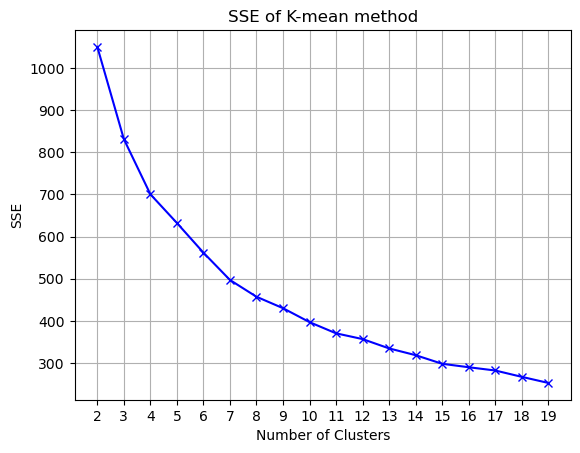

In [10]:
# Plotting SSE
plt.figure()
plt.plot(list(sse_km.keys()), list(sse_km.values()), "bx-")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.xticks(clusters)
plt.title("SSE of K-mean method")
plt.grid()
plt.savefig('images/cd_km_sse.png')
plt.show()

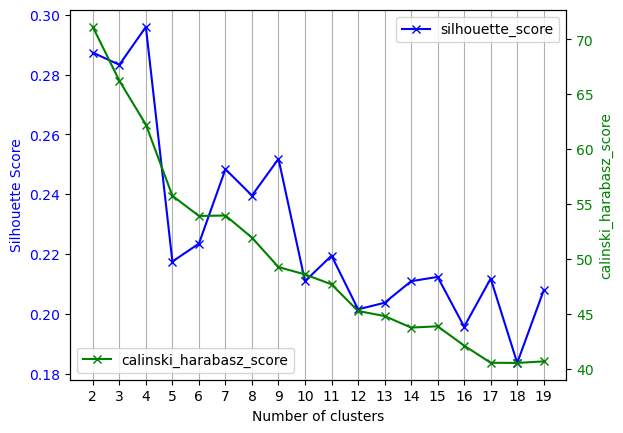

In [11]:
# Plotting scores
# silhouette_score
fig, ax1 = plt.subplots() 
ax1.set_xlabel('Number of clusters') 
ax1.set_ylabel('Silhouette Score', color = "b") 
ax1.plot(list(ss_km.keys()), list(ss_km.values()), "bx-", label='silhouette_score') 
ax1.tick_params(axis ='y', labelcolor = "b") 
 
# calinski_harabasz_score
ax2 = ax1.twinx() 
ax2.set_ylabel('calinski_harabasz_score', color = "g") 
ax2.plot(list(chs_km.keys()), list(chs_km.values()), "gx-", label='calinski_harabasz_score') 
ax2.tick_params(axis ='y', labelcolor = "g") 

ax1.legend(loc=1)
ax2.legend(loc=3)
ax1.set_xticks(clusters)
ax1.grid(axis='x')
plt.savefig('images/cd_km_scores.png')
plt.show()

In [12]:
# calinski_harabasz_score is highest for k = 3
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data_scaled)

# Adding predicted Labels to scaled data and original data
data_scaled["kmean_labels"] = kmeans.predict(data_scaled)
# data_without_country["kmean_labels"] = kmeans.predict(data_scaled)

data_scaled["kmean_labels"].value_counts()

kmean_labels
1    84
0    47
2    36
Name: count, dtype: int64

In [13]:
# Silhouette score is highest for k = 4
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(data_scaled)

# Adding predicted Labels to scaled data and original data
data_scaled["kmean_labels"] = kmeans.predict(data_scaled)
# data_without_country["kmean_labels"] = kmeans.predict(data_scaled)

data_scaled["kmean_labels"].value_counts()

kmean_labels
0    84
1    47
2    33
3     3
Name: count, dtype: int64

# EXPECTATION MAXIMIZATION

In [14]:
log_likelihood_em = {}
ss_em = {}
chs_em = {}
for k in clusters:
    gmm = GaussianMixture(n_components=k, max_iter=200, random_state=1, 
                          n_init=5).fit(data_scaled)
    label = gmm.predict(data_scaled)
    log_likelihood_em[k] = gmm.score(data_scaled)
    ss_em[k] = silhouette_score(data_scaled, label, metric='euclidean')
    chs_em[k] = calinski_harabasz_score(data_scaled, labels)

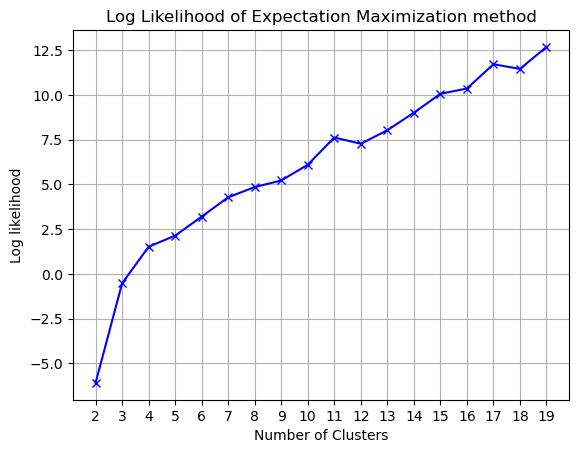

In [15]:
# Plot log likelihood
plt.figure()
plt.plot(list(ss_em.keys()), list(log_likelihood_em.values()), "bx-")
plt.xlabel("Number of Clusters")
plt.ylabel("Log likelihood")
plt.title("Log Likelihood of Expectation Maximization method")
plt.xticks(clusters)
plt.grid()
plt.savefig('images/cd_em_likelihood.png')
plt.show()

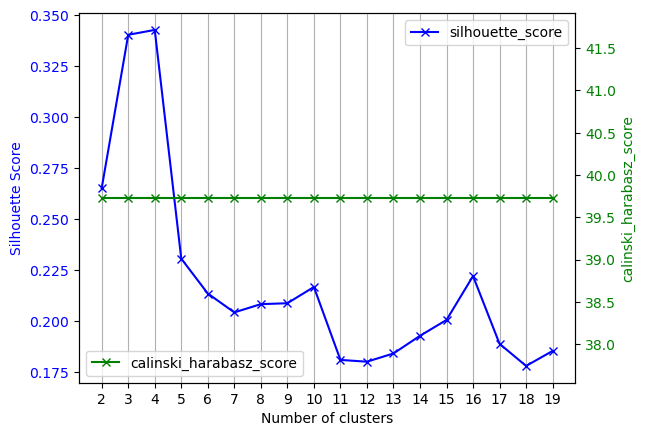

In [16]:
# Plotting scores
# silhouette_score
fig, ax1 = plt.subplots() 
ax1.set_xlabel('Number of clusters') 
ax1.set_ylabel('Silhouette Score', color = "b") 
ax1.plot(list(ss_em.keys()), list(ss_em.values()), "bx-", label='silhouette_score') 
ax1.tick_params(axis ='y', labelcolor = "b") 
 
# calinski_harabasz_score
ax2 = ax1.twinx() 
ax2.set_ylabel('calinski_harabasz_score', color = "g") 
ax2.plot(list(chs_em.keys()), list(chs_em.values()), "gx-", label='calinski_harabasz_score') 
ax2.tick_params(axis ='y', labelcolor = "g") 

ax1.legend(loc=1)
ax2.legend(loc=3)
ax1.set_xticks(clusters)
ax1.grid(axis='x')
plt.savefig('images/cd_em_scores.png')
plt.show()

# PCA

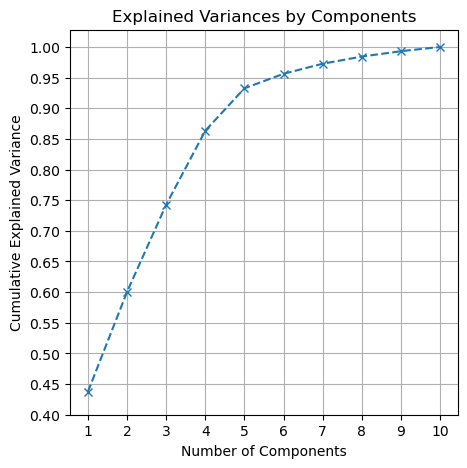

In [17]:
# Number of principal components
n_comp = data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n_comp, random_state=1)
pca.fit_transform(data_scaled)

#The percentage of variance explained by each principal component
# exp_var = pca.explained_variance_

# visualize the Explained Individual Components
plt.figure(figsize = (5, 5))
plt.plot(np.arange(1,n_comp+1), pca.explained_variance_ratio_.cumsum(), marker = 'x', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.xticks(np.arange(1,n_comp+1))
plt.yticks(np.linspace(0.4,1.0,13))
plt.grid()
plt.savefig('images/cd_pca_components.png')
plt.show()

In [18]:
pca.explained_variance_ratio_.cumsum()

array([0.43744248, 0.60041593, 0.74274465, 0.86340145, 0.93256483,
       0.95629279, 0.97267104, 0.98435808, 0.99310919, 1.        ])

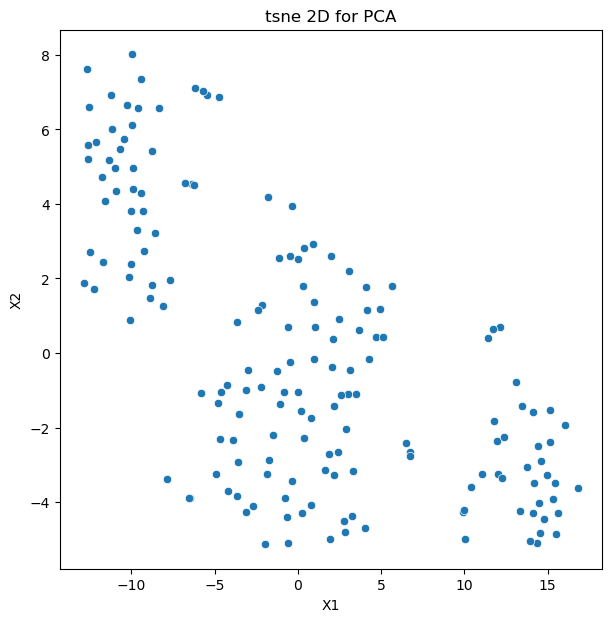

In [19]:
# TSNE 2D
tsne = TSNE(n_components = 2, random_state=1)
data_tsne = tsne.fit_transform(data_scaled)
#Converting the embeddings to a dataframe
data_tsne=pd.DataFrame(data_tsne, columns=['X1', 'X2'])
#Scatter plot for two components
plt.figure(figsize = (7,7))
sns.scatterplot(x = 'X1', y='X2', data = data_tsne)
plt.title("tsne 2D for PCA")
plt.savefig('images/cd_pca_tsne2.png')
plt.show()

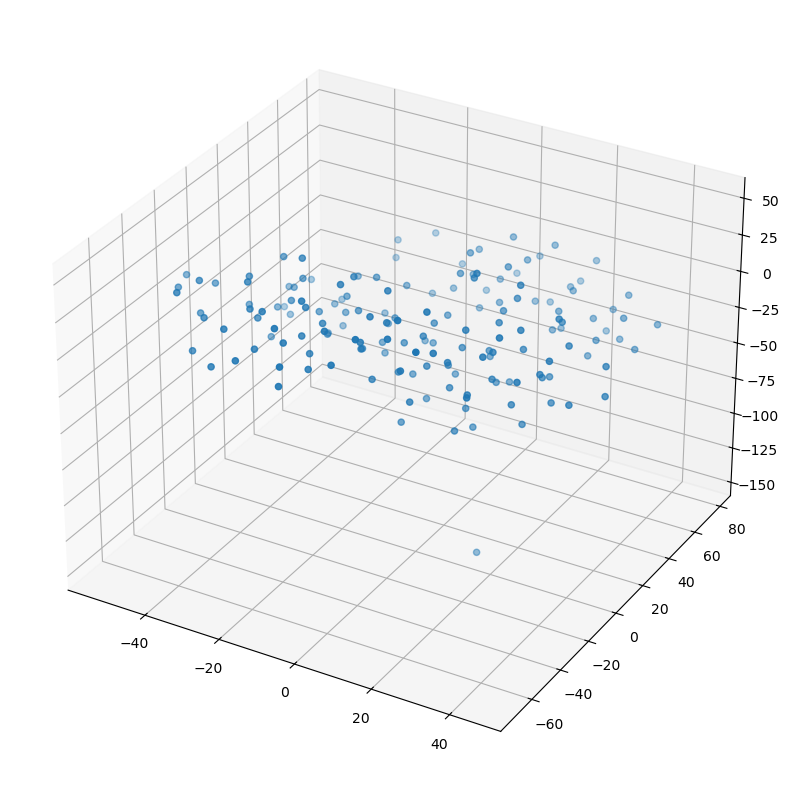

In [20]:
# TSNE 3D
tsne = TSNE(n_components = 3, random_state=1)
data_tsne = tsne.fit_transform(data_scaled)
data_tsne=pd.DataFrame(data_tsne, columns=['X1', 'X2', 'X3'])
#Scatter plot for all three components
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

x = data_tsne['X1']
y = data_tsne['X2']
z = data_tsne['X3']

ax.scatter(x, y, z)
plt.savefig('images/cd_pca_tsne3.png')
plt.show()

# ICA

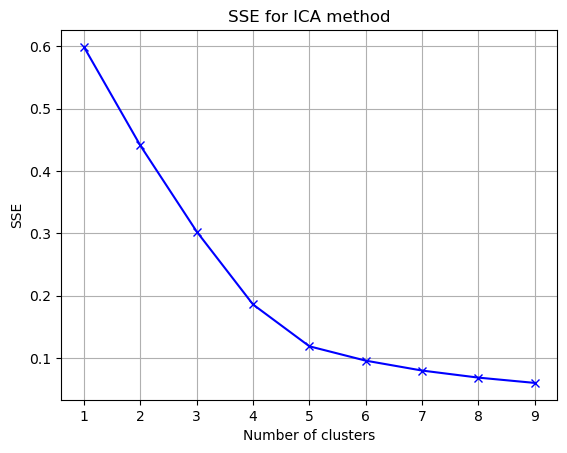

In [21]:
# reconstruction error
rc_errors = {}
for k in np.arange(1,n_comp):
    ica = FastICA(n_components=k, random_state=1)
    x_prime = ica.fit_transform(data_scaled.values)
    
    # reconstruction
    A = np.linalg.pinv(ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(data_scaled.values, reconstructed)    
    rc_errors[k] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors.keys()), list(rc_errors.values()), 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("SSE for ICA method")
plt.grid()
plt.savefig('images/cd_ica_sse.png')
plt.show()

In [22]:
comp = 6
ica = FastICA(n_components=comp, random_state=1, max_iter=1000)
ica_result = ica.fit_transform(data_scaled.values)

# Randomized Projections

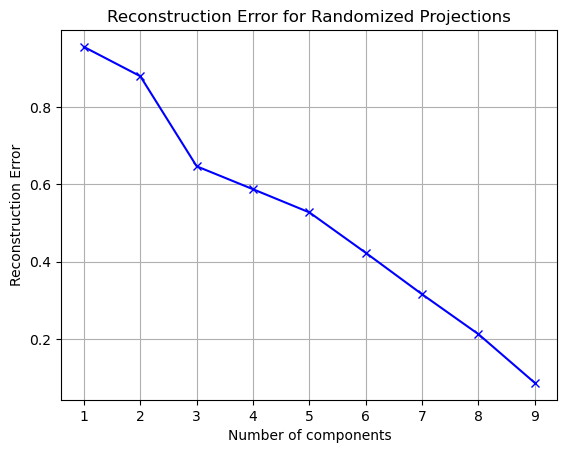

In [23]:
# reconstruction error
rc_errors = {}
for k in np.arange(1,n_comp):
    grp = GaussianRandomProjection(n_components=k, random_state=1)
    x_prime = grp.fit_transform(data_scaled.values)
    
    # reconstruction
    A = np.linalg.pinv(grp.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(data_scaled.values, reconstructed)    
    rc_errors[k] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors.keys()), list(rc_errors.values()), 'bx-')
plt.xlabel("Number of components")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error for Randomized Projections")
plt.grid()
plt.savefig('images/cd_rp_re.png')
plt.show()

In [24]:
comp = 5
grp = GaussianRandomProjection(n_components=comp, random_state=1)
grp_result = grp.fit_transform(data_scaled.values)

# Manifold Learning Algorithm: Isomap Embedding

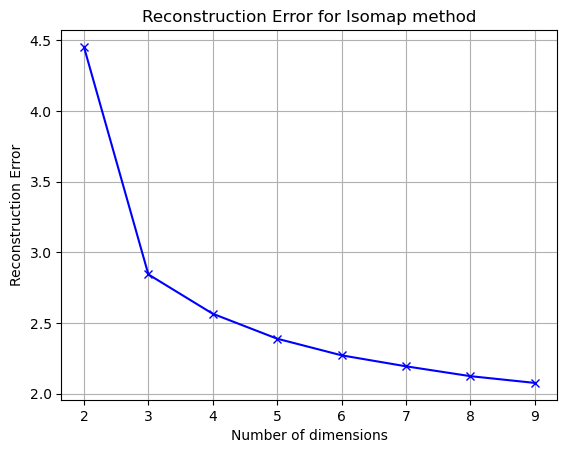

In [26]:
# reconstruction error
rc_errors = {}
for k in np.arange(2,n_comp):
    iso = Isomap(n_components=k, n_neighbors=5)
    x_prime = iso.fit_transform(data_scaled.values)    
    rc_errors[k] = iso.reconstruction_error()

plt.figure()
plt.plot(list(rc_errors.keys()), list(rc_errors.values()), 'bx-')
plt.xlabel("Number of dimensions")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error for Isomap method")
plt.grid()
plt.savefig('images/cd_iso_re.png')
plt.show()

In [27]:
comp = 5
iso = Isomap(n_components=comp, n_neighbors=5)
iso_result = iso.fit_transform(data_scaled.values)